In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

from openbb_terminal.sdk import openbb, TerminalStyle
theme = TerminalStyle("dark", "dark", "dark")
## 가이드 문서 https://docs.openbb.co/sdk/usage/intros


# 시각화 도구
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='space')
import plotly.graph_objects as go

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (5,3)

In [2]:
currency_list = openbb.forex.get_currency_list()

## KRW Position

In [3]:
currency_KRW = openbb.forex.load( from_symbol='USD', to_symbol='KRW', start_date = '2016-01-01', interval = '1day')
## 이상값 보정
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    currency_KRW[col][currency_KRW[col] < 5] = currency_KRW[col][currency_KRW[col] < 5] * 1e4

currency_EUR = openbb.forex.load(from_symbol='USD', to_symbol='EUR', start_date = '2016-01-01', interval = '1day')
currency_JPY = openbb.forex.load(from_symbol='USD', to_symbol='JPY', start_date = '2016-01-01', interval = '1day')

In [4]:
tt = openbb.forex.load( from_symbol='JPY', to_symbol='KRW', start_date = '2016-01-01', interval = '1day')

<Axes: xlabel='date'>

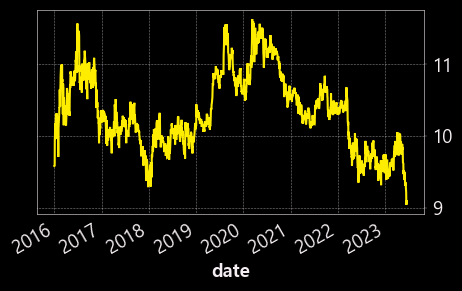

In [7]:
tt['Adj Close'].plot()

In [8]:
temp = pd.concat([currency_KRW['Adj Close'], currency_EUR['Adj Close'], currency_JPY['Adj Close']], axis=1).fillna(method='pad').tail(240*10)
temp.columns = ['KRW', 'EUR', 'JPY']
temp = temp/np.array(temp)[0]

<Axes: xlabel='date'>

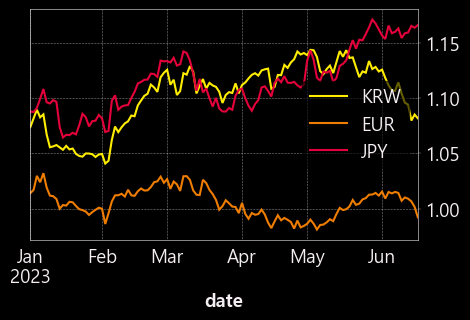

In [9]:
temp.tail(120).plot()

## CHF-AUD

In [10]:
chf_aud = openbb.forex.load(from_symbol='CHF', to_symbol='AUD', start_date = '1950-01-01', interval = '1day')
## 이상값 보정
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    chf_aud[col][chf_aud[col] < 0.1] = chf_aud[col][chf_aud[col] < 0.1] * 1e2

In [11]:
chf_aud['Adj Close'].iplot()

In [8]:
chf_aud

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2003-12-01,1.07120,1.073000,1.056200,1.058400,1.058400,0
2003-12-02,1.05830,1.067300,1.054100,1.059500,1.059500,0
2003-12-03,1.06040,1.063700,1.051700,1.054600,1.054600,0
2003-12-04,1.05420,1.058600,1.049500,1.053400,1.053400,0
2003-12-05,1.05430,1.067100,1.052700,1.066500,1.066500,0
...,...,...,...,...,...,...
2023-06-06,1.66870,1.669820,1.648805,1.668057,1.668057,0
2023-06-07,1.64992,1.653330,1.645820,1.650320,1.650320,0
2023-06-08,1.65070,1.656205,1.642845,1.649930,1.649930,0
